In [1]:
import matplotlib.pyplot as plt
from numpy import *
from numpy.random import *

delta = 1.0
x = linspace(-5,5,11)
y = x ** 2 + delta * (rand(11) - 0.5)
x += delta * (rand(11) - 0.5)

x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')

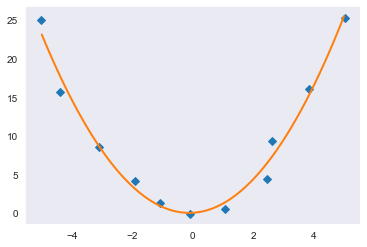

In [4]:
import numpy as np
import matplotlib.pyplot as plt
x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep='\n')

m = vstack((x**2, x, ones(11))).T
s = np.linalg.lstsq(m, y, rcond= None)[0]

x_prec = linspace(-5, 5, 101)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec + s[2], '-', lw=2)
plt.grid()
plt.savefig('парабола.png')

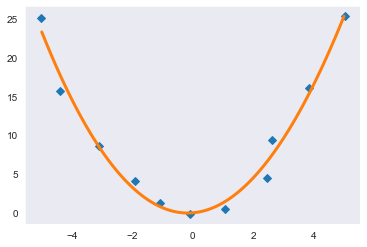

In [5]:
m = vstack((x**3, x**2, x, ones(11))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]
x_prec = linspace(-5, 5, 101)

plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2] * x_prec + s[3], '-', lw=3)
plt.grid()
plt.savefig('полином 3-й степени.png')

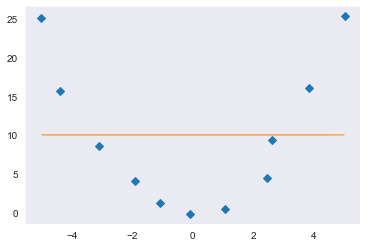

In [6]:
m = vstack(( x, ones(11))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]
x_prec = linspace(-5, 5, 101)

plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec + s[1], '-', lw=1)
plt.grid()
plt.savefig('полином 1-й степени.png')

[0.25139567 0.74494251]
0.0001252567254106099
0.110139534067594


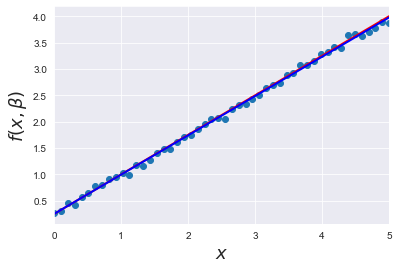

In [8]:
import scipy as sp
beta = (0.25, 0.75)
def f(x, b0, b1):
    return b0 + b1 * x

xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

[0.24459646 0.74779012 0.50018705]
0.0001715696464709582
0.14307112518644066


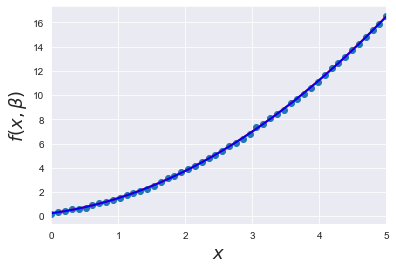

In [9]:
import scipy as sp
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x**2

xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

[1.00326684 2.00299506]
5.344085496024255e-05
0.12357884255903975


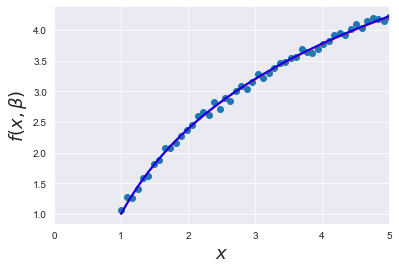

In [10]:
import scipy as sp
beta = (1, 2)
def f(x, b0, b1):
    return b0 + b1 * np.log(x)

xdata = np.linspace(1, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

[0.99933424 1.99997335]
0.00012865982578482153
0.14349171626169732


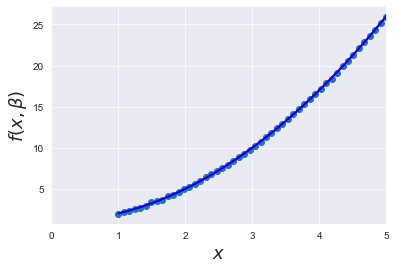

In [11]:
import scipy as sp
beta = (1, 2)
def f(x, b0, b1):
    return b0 + x ** b1

xdata = np.linspace(1, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame,Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
dataset = pd.read_csv("https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv")
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


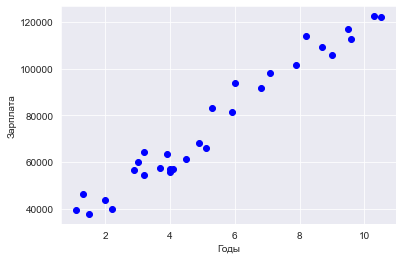

In [3]:
plt.scatter(dataset['YearsExperience'], dataset['Salary'], color='b', label="Статистика зарплат")
plt.xlabel("Годы")
plt.ylabel("Зарплата")
plt.show()

In [4]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(x)
print(y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(x_train,y_train)
print(regressor.intercept_)
print(regressor.coef_)

26780.09915062818
[9312.57512673]


In [22]:
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test,'Predicted': y_pred})
df


,Actual,Predicted
0,37731.0,40748.961841
1,122391.0,122699.622956
2,57081.0,64961.657170
3,63218.0,63099.142145
4,116969.0,115249.562855
5,109431.0,107799.502753


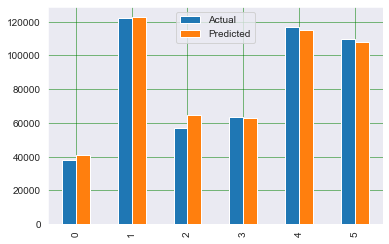

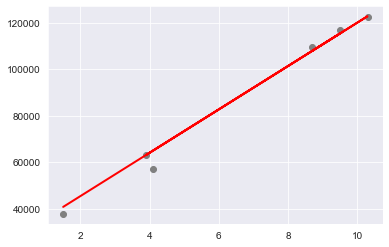

In [24]:
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor',linestyle=':', linewidth='0.5', color='black')
plt.show()
plt.scatter(x_test,y_test, color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

dataframe = pd.read_csv("https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv")
dataframe.head()


,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [29]:
y = dataframe['Petrol_Consumption']
x = [dataframe['Petrol_tax'], dataframe['Average_income'], dataframe['Paved_Highways'], dataframe['Population_Driver_licence(%)']]
new_y = np.array(y)
new_y = new_y.transpose()
df1 = pd.DataFrame(new_y)
new_x = np.array(x)
new_x = new_x.transpose()
df2 = pd.DataFrame(new_x)
df1 = df1.rename(columns={0: 'y'}, inplace=False)
df2 = df2.rename(columns={0:'Petrol_tax', 1:'Average_income', 2:'Paved_Highways', 3:'Population_Driver_licence(%)'}, inplace=False)

frames = [df1, df2]
dataset = pd.concat([df1,df2], axis=1, join="inner")
dataset.head()

,y,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
0,541,9.0,3571.0,1976.0,0.525
1,524,9.0,4092.0,1250.0,0.572
2,561,9.0,3865.0,1586.0,0.580
3,414,7.5,4870.0,2351.0,0.529
4,410,8.0,4399.0,431.0,0.544


In [30]:
print(dataset.shape)
dataset.describe()

(48, 5)


,y,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,576.770833,7.668333,4241.833333,5565.416667,0.570333
std,111.885816,0.950770,573.623768,3491.507166,0.055470
min,344.000000,5.000000,3063.000000,431.000000,0.451000
25%,509.500000,7.000000,3739.000000,3110.250000,0.529750
50%,568.500000,7.500000,4298.000000,4735.500000,0.564500
75%,632.750000,8.125000,4578.750000,7156.000000,0.595250
max,968.000000,10.000000,5342.000000,17782.000000,0.724000


In [31]:
x = dataset[['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']]
y = dataset['y']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(x_train,y_train)

coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-40.016660
Average_income,-0.065413
Paved_Highways,-0.004741
Population_Driver_licence(%),1341.862121


In [32]:
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


In [33]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 4666.344787588363


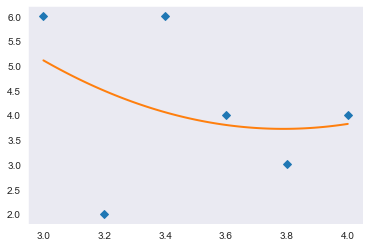

In [19]:
import numpy as np
import matplotlib.pyplot as plt
# вариант 4
x = np.fromfile('x_data_2.txt', float, sep='\n')
y = np.fromfile('y_data_2.txt', float, sep='\n')

m = np.vstack((x**2, x, np.ones(6))).T
s = np.linalg.lstsq(m, y, rcond= None)[0]

x_prec = np.linspace(3, 4, 101)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec + s[2], '-', lw=2)
plt.grid()
plt.savefig('парабола_2.png')

In [25]:
from sklearn import metrics
import pandas as pd
x_approx = np.linspace(3, 4, 6)
y_approx = s[0] * x_approx**2 + s[1] * x_approx + s[2]
df = pd.DataFrame({'Actual': y, 'Approx': y_approx})
df

,Actual,Approx
0,6.0,5.107143
1,2.0,4.492857
2,6.0,4.057143
3,4.0,3.800000
4,3.0,3.721429
5,4.0,3.821429


In [26]:
print('Mean Squared Error:', metrics.mean_squared_error(y, y_approx))

Mean Squared Error: 1.8964285714285722


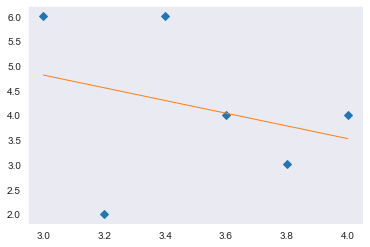

In [30]:
m = np.vstack(( x, np.ones(6))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]
x_prec = np.linspace(3, 4, 101)

plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec + s[1], '-', lw=1)
plt.grid()
plt.savefig('полином 1-й степени_2.png')

In [31]:
from sklearn import metrics
import pandas as pd
x_approx = np.linspace(3, 4, 6)
y_approx = s[0] * x_approx + s[1]
df = pd.DataFrame({'Actual': y, 'Approx': y_approx})
df

,Actual,Approx
0,6.0,4.809524
1,2.0,4.552381
2,6.0,4.295238
3,4.0,4.038095
4,3.0,3.780952
5,4.0,3.523810


In [32]:
print('Mean Squared Error:', metrics.mean_squared_error(y, y_approx))

Mean Squared Error: 1.9460317460317462
